In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

C:\Users\Hp\AppData\Local\Temp\ipykernel_33404\1123596123.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
data = pd.read_csv("student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
X = np.array(data.Hours)
y = np.array(data.Scores)
X,y

(array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
        3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

In [4]:
# Spliting the data for testing and training
def traintestsplit(X,y,split = 0.7):
    m = X.shape[0]
    Split = int(m*split)
    data1 = np.zeros((m , 2))
    data1[:,0] = X
    data1[:,1] = y
    np.random.shuffle(data1)
    Xtrain = data1[:Split ,0]
    ytrain = data1[:Split,1]
    Xtest = data1[Split:,0]
    ytest = data1[Split:,1]
    
    return Xtrain , ytrain , Xtest , ytest

In [5]:
Xtrain , ytrain , Xtest , ytest = traintestsplit(X,y)

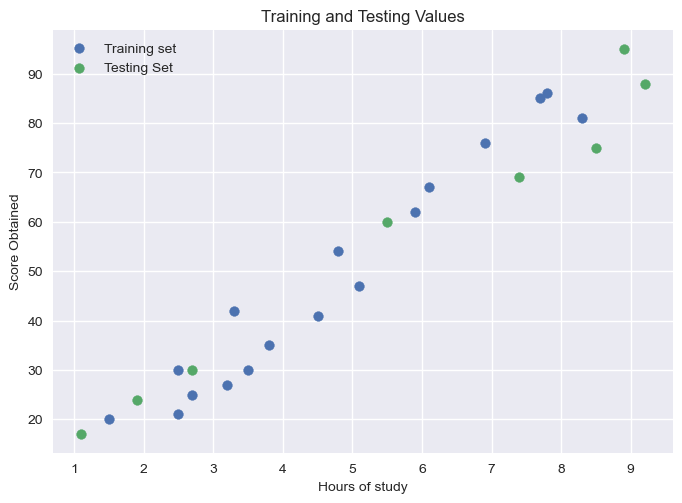

In [6]:
plt.title("Training and Testing Values")
plt.xlabel("Hours of study")
plt.ylabel("Score Obtained")
plt.scatter(Xtrain , ytrain , label = "Training set")
plt.scatter(Xtest , ytest , label = "Testing Set")
plt.legend()
plt.show()

In [7]:
# Finding the best Parameters for the model using Slope , Intercept method
def parameter(X , y):
    Xmean = X.mean()
    ymean = y.mean()
    num = np.sum((X-Xmean)*(y - ymean))
    denom = np.sum((X - Xmean)**2)
    w = num/denom
    b = ymean - w*Xmean
    
    return w , b

In [8]:
w , b  = parameter(Xtrain, ytrain)
w , b

(10.8220528760988, -2.226260904441986)

In [9]:
def predict(X , w , b):
    return w*X + b

In [10]:
y_predict = predict(Xtest , w , b)
y_predict

array([77.85693038, 89.76118854,  9.67799726, 57.29502991, 94.09000969,
       18.33563956, 26.99328186, 97.33662556])

In [11]:
# Model Evaluation

def evaluation(y , y_predict):
    ymean = y.mean()
    num = np.sum((y - y_predict)**2)
    denom = np.sum((y - ymean)**2)
    
    return 1 - num/denom

In [12]:
evaluate = evaluation(ytest , y_predict)
evaluate

0.9227887161673518

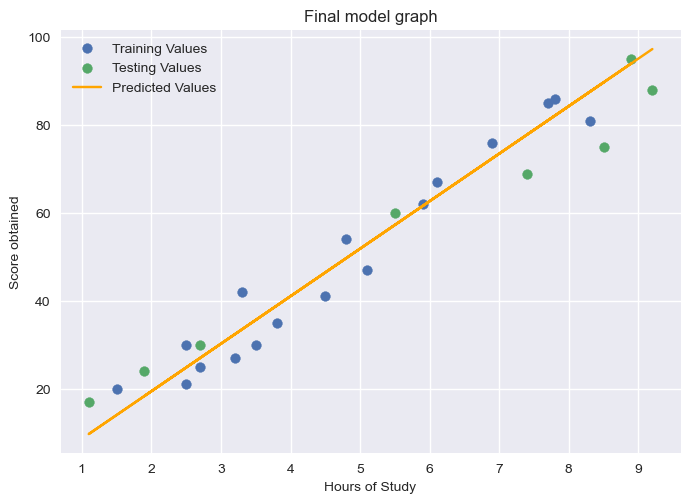

In [13]:
plt.title("Final model graph")
plt.xlabel("Hours of Study")
plt.ylabel("Score obtained")
plt.scatter(Xtrain , ytrain , label = "Training Values")
plt.scatter(Xtest , ytest , label = "Testing Values")
plt.plot(Xtest,y_predict , label = "Predicted Values" , color = "orange")
plt.legend()
plt.show()